In [ ]:
import pandas as pd
import zipfile, io, time, requests
from urllib.parse import urlparse
from datetime import date, timedelta

In [ ]:
start_date = date(2025, 1, 1)
end_date   = date(2025, 10, 8)

colnames = [
 "GLOBALEVENTID","SQLDATE","MonthYear","Year","FractionDate",
 "Actor1Code","Actor1Name","Actor1CountryCode","Actor1KnownGroupCode",
 "Actor1EthnicCode","Actor1Religion1Code","Actor1Religion2Code",
 "Actor1Type1Code","Actor1Type2Code","Actor1Type3Code",
 "Actor2Code","Actor2Name","Actor2CountryCode","Actor2KnownGroupCode",
 "Actor2EthnicCode","Actor2Religion1Code","Actor2Religion2Code",
 "Actor2Type1Code","Actor2Type2Code","Actor2Type3Code",
 "IsRootEvent","EventCode","EventBaseCode","EventRootCode",
 "QuadClass","GoldsteinScale","NumMentions","NumSources",
 "NumArticles","AvgTone","Actor1Geo_Type","Actor1Geo_FullName",
 "Actor1Geo_CountryCode","Actor1Geo_ADM1Code","Actor1Geo_Lat",
 "Actor1Geo_Long","Actor1Geo_FeatureID","Actor2Geo_Type",
 "Actor2Geo_FullName","Actor2Geo_CountryCode","Actor2Geo_ADM1Code",
 "Actor2Geo_Lat","Actor2Geo_Long","Actor2Geo_FeatureID",
 "ActionGeo_Type","ActionGeo_FullName","ActionGeo_CountryCode",
 "ActionGeo_ADM1Code","ActionGeo_Lat","ActionGeo_Long",
 "ActionGeo_FeatureID","DATEADDED","SOURCEURL"
]

usecols = ["SQLDATE","Actor1Name","Actor2Name","AvgTone","GoldsteinScale","SOURCEURL"]

results = []
session = requests.Session()

current = start_date
while current <= end_date:
    day_str = current.strftime("%Y%m%d")
    url = f"http://data.gdeltproject.org/events/{day_str}.export.CSV.zip"
    print(f"Processing {day_str}...")

    try:
        r = session.get(url, timeout=60)
        r.raise_for_status()  # stop if download fails

        with zipfile.ZipFile(io.BytesIO(r.content)) as z:
            csv_name = z.namelist()[0]
            with z.open(csv_name) as f:
                df = pd.read_csv(f, sep="\t", header=None, names=colnames,
                                 usecols=usecols, dtype=str, low_memory=False)

        # search Tesla mentions
        pattern = r'(?i)\b(tesla|tsla|elon\s+musk)\b'
        m = (
            df["Actor1Name"].str.contains(pattern, na=False) |
            df["Actor2Name"].str.contains(pattern, na=False) |
            df["SOURCEURL"].str.contains(r'(?i)tesla|tsla', na=False)
        )
        tesla = df[m].copy()

        if not tesla.empty:
            tesla["domain"] = tesla["SOURCEURL"].apply(
                lambda x: urlparse(x).netloc if isinstance(x, str) else None
            )
            count = len(tesla)
            tesla["daily_count"] = count
            tesla = tesla[["SQLDATE","Actor1Name","Actor2Name","AvgTone",
                           "GoldsteinScale","SOURCEURL","domain","daily_count"]]
            results.append(tesla)

    except Exception as e:
        print(f"Failed on {day_str}: {e}")

    time.sleep(1)
    current += timedelta(days=1)

if results:
    all_data = pd.concat(results, ignore_index=True)
    all_data.to_csv("tesla_gdelt_2025.csv", index=False)
    print("Saved tesla_gdelt_2025.csv with", len(all_data), "rows")
else:
    print("No Tesla records found.")

Processing 20250101...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250102...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250103...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250104...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250105...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250106...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250107...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250108...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250109...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250110...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250111...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250112...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250113...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250114...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250115...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250116...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250117...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250118...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250119...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250120...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250121...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250122...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250123...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250124...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250125...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250126...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250127...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250128...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250129...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250130...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250131...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250201...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250202...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250203...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250204...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250205...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250206...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250207...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250208...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250209...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250210...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250211...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250212...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250213...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250214...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250215...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250216...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250217...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250218...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250219...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250220...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250221...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250222...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250223...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250224...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250225...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250226...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250227...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250228...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250301...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250302...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250303...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250304...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250305...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250306...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250307...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250308...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250309...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250310...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250311...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250312...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250313...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250314...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250315...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250316...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250317...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250318...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250319...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250320...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250321...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250322...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250323...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250324...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250325...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250326...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250327...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250328...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250329...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250330...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250331...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250401...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250402...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250403...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250404...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250405...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250406...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250407...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250408...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250409...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250410...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250411...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250412...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250413...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250414...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250415...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250416...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250417...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250418...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250419...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250420...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250421...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250422...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250423...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250424...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250425...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250426...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250427...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250428...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250429...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250430...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250501...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250502...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250503...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250504...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250505...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250506...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250507...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250508...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250509...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250510...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250511...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250512...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250513...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250514...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250515...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250516...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250517...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250518...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250519...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250520...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250521...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250522...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250523...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250524...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250525...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250526...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250527...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250528...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250529...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250530...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250531...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250601...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250602...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250603...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250604...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250605...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250606...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250607...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250608...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250609...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250610...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250611...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250612...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250613...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250614...
Failed on 20250614: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250614.export.CSV.zip
Processing 20250615...
Failed on 20250615: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250615.export.CSV.zip
Processing 20250616...
Failed on 20250616: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250616.export.CSV.zip
Processing 20250617...
Failed on 20250617: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250617.export.CSV.zip
Processing 20250618...
Failed on 20250618: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250618.export.CSV.zip
Processing 20250619...
Failed on 20250619: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250619.export.CSV.zip
Processing 20250620...
Failed on 20250620: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250620.export.CSV.zip
Processing 20250621.

/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250703...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250704...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250705...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250706...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250707...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250708...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250709...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250710...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250711...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250712...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250713...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250714...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250715...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250716...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250717...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250718...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250719...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250720...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250721...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250722...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250723...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250724...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250725...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250726...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250727...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250728...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250729...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250730...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250731...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250801...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250802...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250803...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250804...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250805...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250806...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250807...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250808...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250809...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250810...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250811...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250812...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250813...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250814...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250815...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250816...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250817...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250818...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250819...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250820...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250821...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250822...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250823...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250824...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250825...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250826...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250827...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250828...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250829...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250830...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250831...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250901...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250902...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250903...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250904...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250905...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250906...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250907...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250908...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250909...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250910...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250911...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250912...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250913...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250914...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250915...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250916...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250917...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250918...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250919...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250920...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250921...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250922...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250923...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250924...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250925...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250926...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250927...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250928...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250929...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20250930...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251001...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251002...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251003...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251004...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251005...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251006...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251007...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Processing 20251008...


/tmp/ipython-input-99798578.py:56: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(pattern, na=False) |
/tmp/ipython-input-99798578.py:57: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(pattern, na=False) |


Saved tesla_gdelt_2025.csv with 43546 rows


In [ ]:
import os
os.path.getsize("tesla_gdelt_2025.csv") / (1024 * 1024)

FileNotFoundError: [Errno 2] No such file or directory: 'tesla_gdelt_2025.csv'

In [ ]:
from google.colab import files

In [ ]:
files.download("tesla_gdelt_2025.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

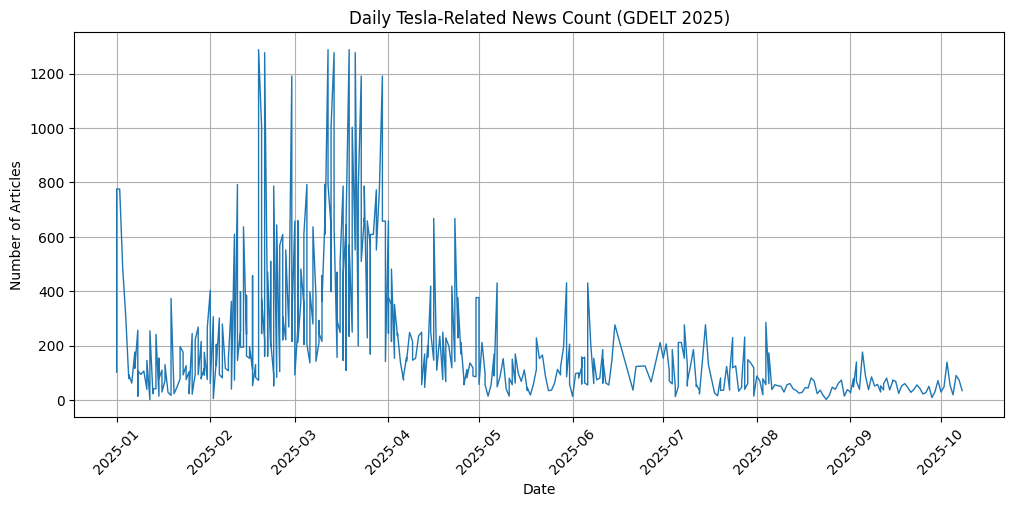

In [ ]:
df = pd.read_csv("tesla_gdelt_2025.csv")
df_copy = df.copy()

df_copy["SQLDATE"] = pd.to_datetime(df_copy["SQLDATE"], format="%Y%m%d", errors="coerce")

df_copy = df_copy[df_copy["SQLDATE"].dt.year == 2025]

df_copy = df_copy.dropna(subset=["SQLDATE"])

daily_counts = df_copy[["SQLDATE", "daily_count"]].drop_duplicates().sort_values("SQLDATE")

plt.figure(figsize=(12,5))
plt.plot(daily_counts["SQLDATE"], daily_counts["daily_count"], linewidth=1)
plt.title("Daily Tesla-Related News Count (GDELT 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
df_copy.sort_values("SQLDATE").tail(1)


,SQLDATE,Actor1Name,Actor2Name,AvgTone,GoldsteinScale,SOURCEURL,domain,daily_count
43545,2025-10-08,MIAMI,NaN,-9.649123,2.8,https://abc7chicago.com/post/first-responders-...,abc7chicago.com,35


In [ ]:
print(len(df_copy[df_copy["SQLDATE"].dt.year == 2025]))

43114


In [5]:
pip install keybert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.4 MB/s eta 0:00:00


In [6]:
from keybert import KeyBERT

In [7]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
from PyPDF2 import PdfReader

reader = PdfReader("Tesla,_Inc..pdf")
doc = "".join(page.extract_text() for page in reader.pages)

print(doc[:1000])

Tesla, Inc.
Gigafactory Texas, Tesla's headquarters, just
outside of Austin, Texas
Formerly Tesla Motors, Inc. (2003–
2017)
Company typePublic
Traded as Nasdaq: TSLA (https://www.n
asdaq.com/market-activity/st
ocks/tsla)
Nasdaq-100 component
S&P 100 component
S&P 500 component
ISIN US88160R1014 (https://isin.t
oolforge.org/?language=en&i
sin=US88160R1014)
Industry Automotive
Renewable energy
Founded July 1, 2003 in San Carlos,
California, U.S.
Founders Martin Eberhard
Marc Tarpenning
(See § Founding)
HeadquartersAustin, Texas, U.S.
Number of
locations
 1,359 sales, service, and
delivery centers
 7,000 Supercharger
stations[1]
Area served East Asia · Europe · Middle
East · North America ·
Tesla, Inc.
Tesla, Inc. (/ˈtɛzlə/ TEZ-l ə or /ˈtɛslə/ ⓘ TESS-l ə[a]) is an American
multinational automotive  and clean energy company . Headquartered in
Austin, Texas, it designs, manufactures and sells battery electric vehicles
(BEVs), stationary battery energy storage  devices from home to grid-
sca

In [8]:
import re

In [ ]:
kw_model = KeyBERT()
clean_doc = re.sub(r'\w*tesla\w*', '', doc, flags=re.IGNORECASE)

keywords = kw_model.extract_keywords(
    clean_doc,
    keyphrase_ngram_range=(1, 2),
    stop_words='english',
    top_n=100
)

print(keywords)

[('energy company', 0.5798), ('fuels company', 0.5496), ('headquarters powertrain', 0.5356), ('automotive renewable', 0.5269), ('energy subsidiary', 0.515), ('largest automakers', 0.492), ('largest carmakers', 0.4827), ('motors founders', 0.482), ('incorporated motors', 0.4796), ('supercharger stations', 0.4699), ('texas motors', 0.4655), ('vehicle manufacturer', 0.4646), ('supercharger station', 0.4625), ('power company', 0.4617), ('energyproperty owners', 0.4613), ('car manufacturer', 0.4604), ('motor company', 0.4565), ('ev company', 0.456), ('headquarters texas', 0.4553), ('energy founded', 0.4553), ('subsidiary energy', 0.4545), ('texas headquarters', 0.4535), ('company headquartered', 0.4488), ('car company', 0.4487), ('automotive manufacturers', 0.4455), ('battery company', 0.4445), ('company texas', 0.4436), ('industry motors', 0.4385), ('ev manufacturers', 0.4375), ('fuels electricity_infrastructure', 0.4355), ('business energy', 0.4315), ('energy gov', 0.4258), ('commercial p

In [ ]:
for kw, score in keywords:
    print(f"{kw}  ({score:.4f})")

energy company  (0.5798)
fuels company  (0.5496)
headquarters powertrain  (0.5356)
automotive renewable  (0.5269)
energy subsidiary  (0.5150)
largest automakers  (0.4920)
largest carmakers  (0.4827)
motors founders  (0.4820)
incorporated motors  (0.4796)
supercharger stations  (0.4699)
texas motors  (0.4655)
vehicle manufacturer  (0.4646)
supercharger station  (0.4625)
power company  (0.4617)
energyproperty owners  (0.4613)
car manufacturer  (0.4604)
motor company  (0.4565)
ev company  (0.4560)
headquarters texas  (0.4553)
energy founded  (0.4553)
subsidiary energy  (0.4545)
texas headquarters  (0.4535)
company headquartered  (0.4488)
car company  (0.4487)
automotive manufacturers  (0.4455)
battery company  (0.4445)
company texas  (0.4436)
industry motors  (0.4385)
ev manufacturers  (0.4375)
fuels electricity_infrastructure  (0.4355)
business energy  (0.4315)
energy gov  (0.4258)
commercial powertrain  (0.4257)
fuels electricity_infrastructur  (0.4187)
www motortrend  (0.4185)
gm toyot

In [12]:
#elon musk wiki
!pip install wikipedia-api keybert sentence-transformers


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15383 sha256=a40c2e58c771f50393505f12cd8a074858e5585369357f2f290b7c25bf81483c
  Stored in directory: /root/.cache/pip/wheels/33/3c/79/b36253689d838af4a0539782853ac3cc38a83a6591ad570dde
Successfully built wikipedia-api


In [17]:
import re
import wikipediaapi
from keybert import KeyBERT

# identify yourself nicely to Wikipedia
wiki = wikipediaapi.Wikipedia(
    user_agent='MyNLPProject/1.0 (https://example.com)',
    language='en'
)

# fetch Elon Musk page
page = wiki.page('Elon Musk')
doc = page.text

# remove his name so it doesn’t dominate results
clean_doc = re.sub(r'\b(elon|musk|tesla)\b', '', doc, flags=re.IGNORECASE)

# extract keywords
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(
    clean_doc,
    keyphrase_ngram_range=(1, 2),
    stop_words='english',
    top_n=100
)

# display results
for kw, score in keywords:
    print(f"{kw}\t({score:.4f})")

spacex founded	(0.5418)
founded spacex	(0.5339)
company spacex	(0.5163)
spacex ceo	(0.5149)
company xai	(0.4861)
llc spacex	(0.4794)
xai wealthiest	(0.4752)
spacex xai	(0.4701)
bankrupt spacex	(0.4672)
spacex began	(0.4474)
spacex developing	(0.4455)
google founder	(0.4432)
investors spacex	(0.4393)
company zip2	(0.4215)
founded software	(0.4164)
company founded	(0.4130)
engineer spacex	(0.4120)
spacex	(0.4059)
acquired zip2	(0.4058)
leadership spacex	(0.4007)
founded com	(0.3982)
spacex succeeded	(0.3970)
engineers spacex	(0.3929)
spacex offices	(0.3890)
spacex 2020	(0.3884)
founder	(0.3873)
xai hired	(0.3816)
ebay billion	(0.3801)
ventures 1995	(0.3746)
spacex twitter	(0.3744)
2020 spacex	(0.3742)
spacex successfully	(0.3726)
cost spacex	(0.3710)
zip2 funds	(0.3686)
ceo twitter	(0.3680)
company began	(0.3664)
establish xai	(0.3656)
founded web	(0.3635)
twitter xai	(0.3623)
businessman entrepreneur	(0.3616)
california spacex	(0.3608)
ventures	(0.3583)
intuit ceo	(0.3558)
entrepreneur 

#use these words in gdelts DB

In [19]:
# deps: pandas, requests
import io, re, time, zipfile, requests, pandas as pd
from urllib.parse import urlparse
from datetime import date, timedelta

start_date = date(2025, 1, 1)
end_date   = date(2025, 10, 8)

colnames = [
 "GLOBALEVENTID","SQLDATE","MonthYear","Year","FractionDate",
 "Actor1Code","Actor1Name","Actor1CountryCode","Actor1KnownGroupCode",
 "Actor1EthnicCode","Actor1Religion1Code","Actor1Religion2Code",
 "Actor1Type1Code","Actor1Type2Code","Actor1Type3Code",
 "Actor2Code","Actor2Name","Actor2CountryCode","Actor2KnownGroupCode",
 "Actor2EthnicCode","Actor2Religion1Code","Actor2Religion2Code",
 "Actor2Type1Code","Actor2Type2Code","Actor2Type3Code",
 "IsRootEvent","EventCode","EventBaseCode","EventRootCode",
 "QuadClass","GoldsteinScale","NumMentions","NumSources",
 "NumArticles","AvgTone","Actor1Geo_Type","Actor1Geo_FullName",
 "Actor1Geo_CountryCode","Actor1Geo_ADM1Code","Actor1Geo_Lat",
 "Actor1Geo_Long","Actor1Geo_FeatureID","Actor2Geo_Type",
 "Actor2Geo_FullName","Actor2Geo_CountryCode","Actor2Geo_ADM1Code",
 "Actor2Geo_Lat","Actor2Geo_Long","Actor2Geo_FeatureID",
 "ActionGeo_Type","ActionGeo_FullName","ActionGeo_CountryCode",
 "ActionGeo_ADM1Code","ActionGeo_Lat","ActionGeo_Long",
 "ActionGeo_FeatureID","DATEADDED","SOURCEURL"
]
usecols = ["SQLDATE","Actor1Name","Actor2Name","AvgTone","GoldsteinScale","SOURCEURL"]

# Elon/Tesla-ecosystem phrases
keywords = [
    "spacex founded","spacex ceo","company xai","energy company",
    "automotive renewable","energy subsidiary","supercharger stations",
    "largest automakers","largest carmakers"
]
# build regex for names (handles spaces safely)
name_pat = r'(?i)(' + '|'.join(map(re.escape, keywords)) + r')'
# URLs don't have spaces; use simplified URL-friendly tokens
url_pat = r'(?i)\b(spacex|xai|supercharger|automaker|automakers|carmakers|carmaker|energy|automotive|renewable|station|stations)\b'

results = []
session = requests.Session()
current = start_date

while current <= end_date:
    day_str = current.strftime("%Y%m%d")
    url = f"http://data.gdeltproject.org/events/{day_str}.export.CSV.zip"
    print(f"Processing {day_str}...")

    try:
        r = session.get(url, timeout=60)
        r.raise_for_status()

        with zipfile.ZipFile(io.BytesIO(r.content)) as z:
            csv_name = z.namelist()[0]
            with z.open(csv_name) as f:
                df = pd.read_csv(f, sep="\t", header=None, names=colnames,
                                 usecols=usecols, dtype=str, low_memory=False)

        m = (
            df["Actor1Name"].str.contains(name_pat, na=False) |
            df["Actor2Name"].str.contains(name_pat, na=False) |
            df["SOURCEURL"].str.contains(url_pat, na=False)
        )
        elon_related = df[m].copy()

        if not elon_related.empty:
            elon_related["domain"] = elon_related["SOURCEURL"].apply(
                lambda x: urlparse(x).netloc if isinstance(x, str) else None
            )
            elon_related["daily_count"] = len(elon_related)
            elon_related = elon_related[[
                "SQLDATE","Actor1Name","Actor2Name","AvgTone",
                "GoldsteinScale","SOURCEURL","domain","daily_count"
            ]]
            results.append(elon_related)

    except Exception as e:
        print(f"Failed on {day_str}: {e}")

    time.sleep(1)
    current += timedelta(days=1)

if results:
    all_data = pd.concat(results, ignore_index=True)
    all_data.to_csv("elon_related_2025.csv", index=False)
    print("Saved elon_related_2025.csv with", len(all_data), "rows")
else:
    print("No Elon-related records found.")

Processing 20250101...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250102...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250103...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250104...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250105...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250106...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250107...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250108...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250109...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250110...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250111...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250112...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250113...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250114...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250115...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250116...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250117...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250118...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250119...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250120...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250121...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250122...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250123...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250124...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250125...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250126...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250127...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250128...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250129...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250130...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250131...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250201...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250202...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250203...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250204...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250205...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250206...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250207...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250208...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250209...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250210...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250211...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250212...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250213...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250214...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250215...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250216...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250217...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250218...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250219...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250220...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250221...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250222...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250223...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250224...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250225...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250226...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250227...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250228...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250301...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250302...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250303...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250304...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250305...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250306...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250307...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250308...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250309...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250310...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250311...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250312...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250313...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250314...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250315...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250316...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250317...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250318...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250319...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250320...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250321...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250322...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250323...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250324...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250325...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250326...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250327...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250328...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250329...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250330...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250331...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250401...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250402...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250403...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250404...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250405...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250406...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250407...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250408...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250409...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250410...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250411...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250412...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250413...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250414...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250415...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250416...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250417...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250418...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250419...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250420...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250421...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250422...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250423...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250424...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250425...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250426...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250427...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250428...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250429...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250430...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250501...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250502...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250503...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250504...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250505...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250506...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250507...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250508...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250509...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250510...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250511...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250512...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250513...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250514...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250515...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250516...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250517...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250518...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250519...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250520...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250521...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250522...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250523...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250524...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250525...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250526...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250527...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250528...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250529...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250530...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250531...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250601...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250602...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250603...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250604...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250605...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250606...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250607...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250608...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250609...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250610...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250611...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250612...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250613...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250614...
Failed on 20250614: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250614.export.CSV.zip
Processing 20250615...
Failed on 20250615: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250615.export.CSV.zip
Processing 20250616...
Failed on 20250616: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250616.export.CSV.zip
Processing 20250617...
Failed on 20250617: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250617.export.CSV.zip
Processing 20250618...
Failed on 20250618: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250618.export.CSV.zip
Processing 20250619...
Failed on 20250619: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250619.export.CSV.zip
Processing 20250620...
Failed on 20250620: 404 Client Error: Not Found for url: http://data.gdeltproject.org/events/20250620.export.CSV.zip
Processing 20250621.

/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250703...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250704...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250705...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250706...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250707...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250708...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250709...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250710...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250711...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250712...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250713...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250714...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250715...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250716...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250717...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250718...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250719...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250720...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250721...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250722...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250723...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250724...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250725...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250726...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250727...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250728...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250729...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250730...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250731...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250801...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250802...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250803...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250804...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250805...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250806...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250807...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250808...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250809...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250810...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250811...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250812...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250813...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250814...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250815...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250816...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250817...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250818...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250819...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250820...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250821...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250822...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250823...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250824...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250825...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250826...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250827...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250828...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250829...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250830...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250831...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250901...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250902...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250903...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250904...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250905...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250906...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250907...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250908...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250909...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250910...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250911...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250912...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250913...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250914...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250915...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250916...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250917...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250918...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250919...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250920...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250921...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250922...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250923...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250924...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250925...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250926...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250927...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250928...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250929...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20250930...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251001...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251002...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251003...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251004...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251005...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251006...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251007...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Processing 20251008...


/tmp/ipython-input-1131038958.py:61: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor1Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:62: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["Actor2Name"].str.contains(name_pat, na=False) |
/tmp/ipython-input-1131038958.py:63: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["SOURCEURL"].str.contains(url_pat, na=False)


Saved elon_related_2025.csv with 234917 rows


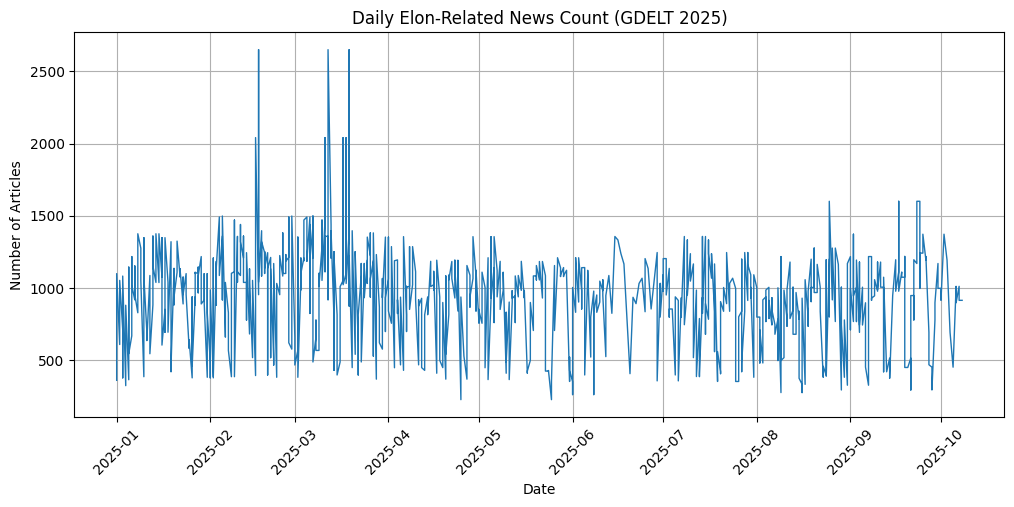

In [20]:
df = pd.read_csv("elon_related_2025.csv")
df_copy = df.copy()

df_copy["SQLDATE"] = pd.to_datetime(df_copy["SQLDATE"], format="%Y%m%d", errors="coerce")

df_copy = df_copy[df_copy["SQLDATE"].dt.year == 2025]

df_copy = df_copy.dropna(subset=["SQLDATE"])

daily_counts = df_copy[["SQLDATE", "daily_count"]].drop_duplicates().sort_values("SQLDATE")

plt.figure(figsize=(12,5))
plt.plot(daily_counts["SQLDATE"], daily_counts["daily_count"], linewidth=1)
plt.title("Daily Elon-Related News Count (GDELT 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

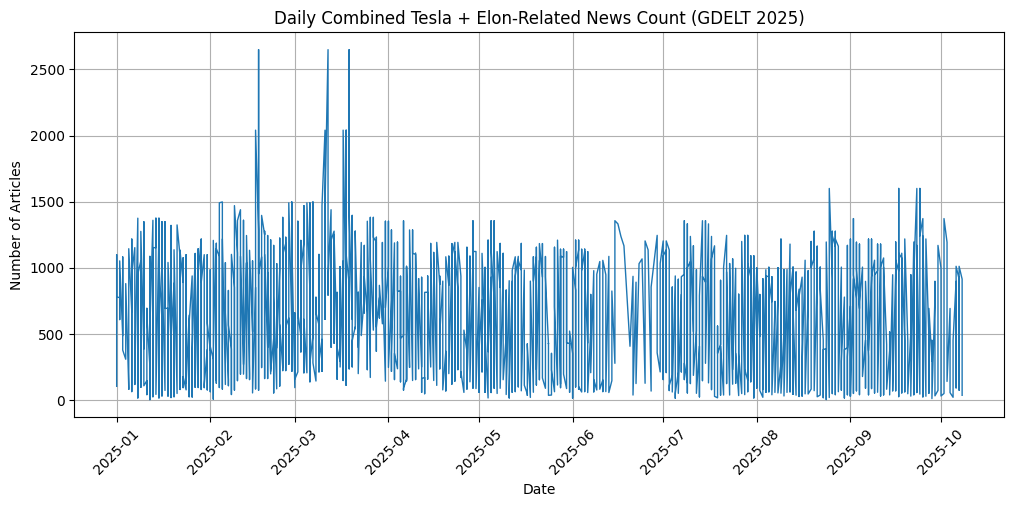

In [4]:
tesla_df = pd.read_csv("tesla_gdelt_2025.csv")
elon_df = pd.read_csv("elon_related_2025.csv")

# combine them
combined = pd.concat([tesla_df, elon_df], ignore_index=True)

# clean, format, and filter only 2025 dates
combined["SQLDATE"] = pd.to_datetime(combined["SQLDATE"], format="%Y%m%d", errors="coerce")
combined = combined.dropna(subset=["SQLDATE"])
combined = combined[(combined["SQLDATE"] >= "2025-01-01") & (combined["SQLDATE"] <= "2025-12-31")]

# get unique daily counts
daily_counts = combined[["SQLDATE", "daily_count"]].drop_duplicates().sort_values("SQLDATE")

# plot combined results
plt.figure(figsize=(12,5))
plt.plot(daily_counts["SQLDATE"], daily_counts["daily_count"], linewidth=1)
plt.title("Daily Combined Tesla + Elon-Related News Count (GDELT 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

/tmp/ipython-input-2918052651.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla = yf.download("TSLA", start="2025-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed


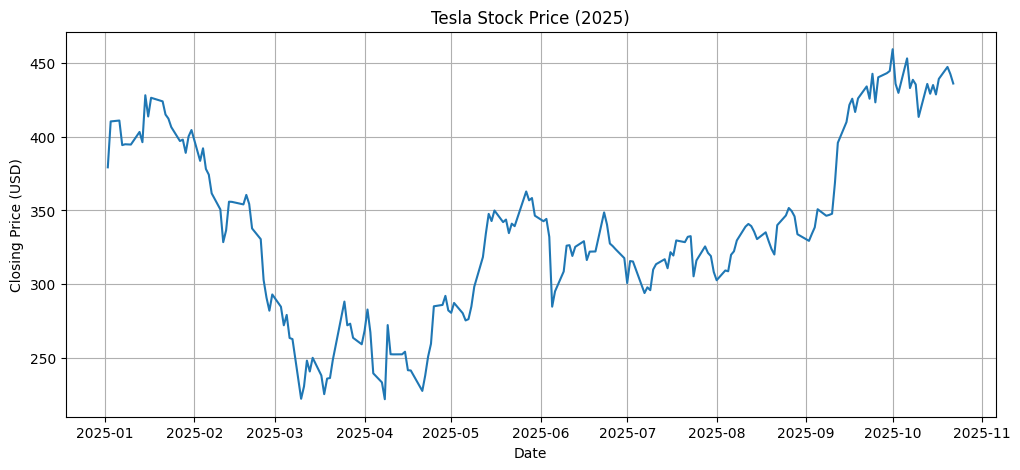

In [5]:
# download Tesla stock prices for 2025
tesla = yf.download("TSLA", start="2025-01-01", end="2025-12-31")

plt.figure(figsize=(12,5))
plt.plot(tesla.index, tesla["Close"], linewidth=1.5)
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()